In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/master_data_with_sequel_director.csv',
                usecols= ['movie_title','budget','domestic_opening_sales',
                          'domestic_dist_processed','rating','release_date',
                         'is_sequel','Action','Adventure','Animation','Biography',
                          'Comedy','Crime','Drama','Fantasy','Family','History','Horror',
                          'Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','Western','domestic_gross'])

In [3]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   movie_title              723 non-null    object
 1   budget                   723 non-null    int64 
 2   domestic_opening_sales   723 non-null    int64 
 3   rating                   723 non-null    object
 4   Action                   723 non-null    int64 
 5   Adventure                723 non-null    int64 
 6   Animation                723 non-null    int64 
 7   Biography                723 non-null    int64 
 8   Comedy                   723 non-null    int64 
 9   Crime                    723 non-null    int64 
 10  Drama                    723 non-null    int64 
 11  Fantasy                  723 non-null    int64 
 12  Family                   723 non-null    int64 
 13  History                  723 non-null    int64 
 14  Horror                   723 non-null    i

In [5]:
years = list(range(2000,2021,1))

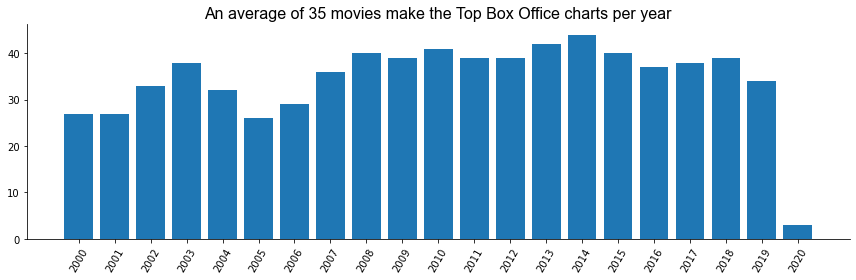

In [6]:
movies_year = df.groupby('year')['movie_title'].count().reindex(years)
movies_year_list = list(movies_year)

plt.figure(figsize=[12,4])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.bar(years,movies_year)   
plt.xticks(years,rotation=60)
plt.title('An average of 35 movies make the Top Box Office charts per year',family='arial',fontsize=16)
plt.tight_layout()

#plt.savefig("movies_per_year.svg")

plt.show;




In [7]:
movies_year

year
2000    27
2001    27
2002    33
2003    38
2004    32
2005    26
2006    29
2007    36
2008    40
2009    39
2010    41
2011    39
2012    39
2013    42
2014    44
2015    40
2016    37
2017    38
2018    39
2019    34
2020     3
Name: movie_title, dtype: int64

In [8]:
budget_mean = df['budget'].mean()

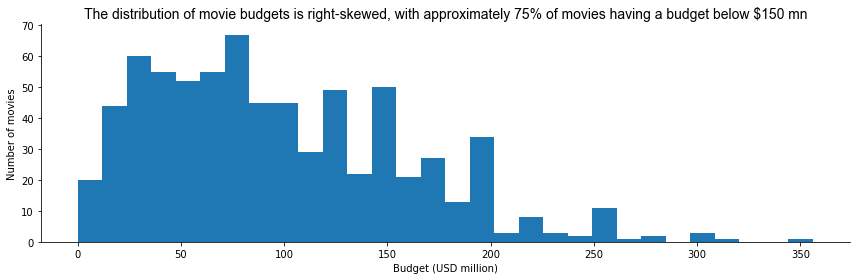

In [26]:
plt.figure(figsize=[12,4])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.hist(df['budget']/1000000,bins=30)
plt.title('The distribution of movie budgets is right-skewed, with approximately 75% of movies having a budget below $150 mn',family='arial',fontsize=14)
plt.tight_layout()
plt.xlabel('Budget (USD million)')
plt.ylabel('Number of movies')

plt.tight_layout()
plt.show;
#plt.savefig("movie_budget_distribution.svg")

In [10]:
df1= pd.read_csv('data/total_boxoffice_tickets.csv')

# 

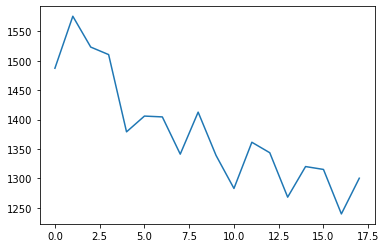

In [11]:
plt.plot(df1['tickets_sold_mn'])

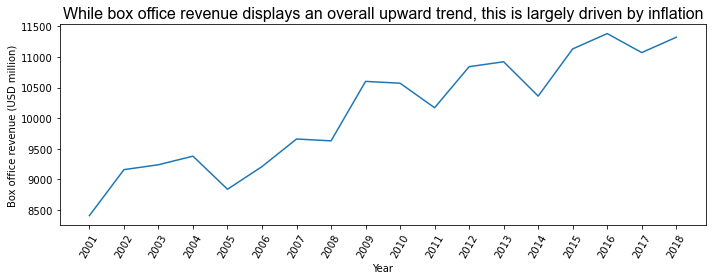

In [12]:
years = df1['year']#[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
plt.figure(figsize=[10,4])
plt.plot(df1['total_boxoffice_revenue_mn'])
spacing = np.linspace(0,17,18)
plt.xticks(spacing,years,rotation=60)
plt.title('While box office revenue displays an overall upward trend, this is largely driven by inflation',family='arial',fontsize=16)
plt.xlabel('Year')
plt.ylabel('Box office revenue (USD million)')

plt.tight_layout()
plt.show;

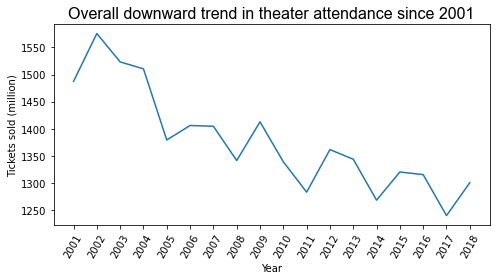

In [43]:
years = df1['year']#[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
plt.figure(figsize=[7,4])
plt.plot(df1['tickets_sold_mn'])
spacing = np.linspace(0,17,18)
plt.xticks(spacing,years,rotation=60)
plt.title('Overall downward trend in theater attendance since 2001',family='arial',fontsize=16)
plt.xlabel('Year')
plt.ylabel('Tickets sold (million)')

plt.tight_layout()
plt.savefig("movietickets.svg")
plt.show;

In [14]:
df1

,year,tickets_sold_mn,total_boxoffice_revenue_mn
0,2001,1487.3,8410
1,2002,1575.7,9160
2,2003,1523.3,9240
3,2004,1510.5,9380
4,2005,1379.2,8840
5,2006,1406.0,9210
6,2007,1404.6,9660
7,2008,1341.3,9630
8,2009,1412.7,10600
9,2010,1339.1,10570


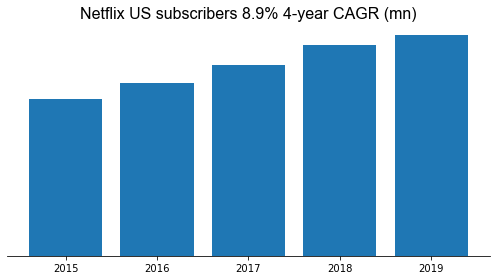

In [44]:
# Netflix

netflix_sub = [43.4,47.9,52.8,58.5,61]
netflix_years = [2015,2016,2017,2018,2019]

plt.figure(figsize=[7,4])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.bar(netflix_years,netflix_sub)   
plt.xticks(netflix_years)
plt.title('Netflix US subscribers 8.9% 4-year CAGR (mn)',family='arial',fontsize=16)
plt.savefig("netflix.svg")
plt.tight_layout()

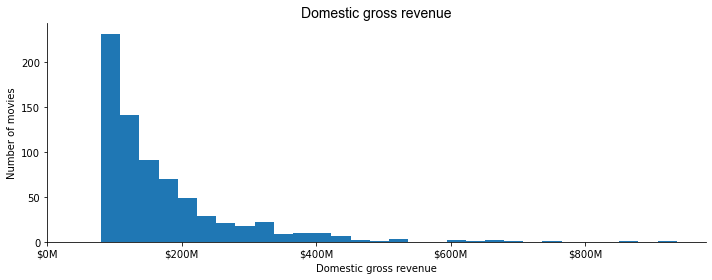

In [47]:
plt.figure(figsize=[10,4])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.hist(df['domestic_gross'],bins=30)
plt.title('Domestic gross revenue',family='arial',fontsize=14)
plt.xticks(np.linspace(0,800000000,5), ['$0M','$200M','$400M','$600M','$800M'])
plt.xlabel('Domestic gross revenue')
plt.ylabel('Number of movies')

plt.tight_layout()
plt.savefig("domesticrevenue.svg")
plt.show;


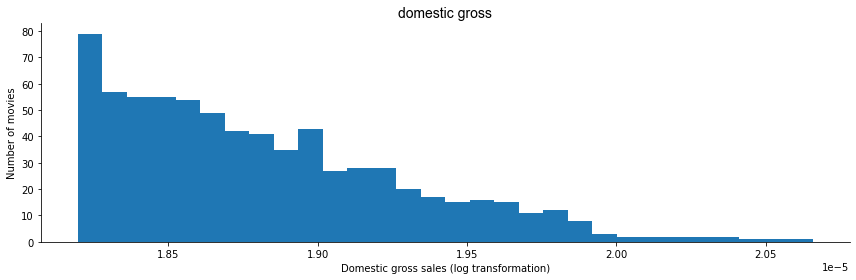

In [17]:
plt.figure(figsize=[12,4])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.hist(np.log(df['domestic_gross'])/1000000,bins=30)
plt.title('domestic gross',family='arial',fontsize=14)

plt.xlabel('Domestic gross sales (log transformation)')
plt.ylabel('Number of movies')

plt.tight_layout()
plt.show;
#plt.savefig("movie_budget_distribution.svg")